In [1]:
import matplotlib.pyplot as plt
import pandas  as pd
import numpy as np
from sklearn import datasets

In [3]:
# import iris datasets
iris=datasets.load_iris()

In [4]:
iris_data=pd.DataFrame(iris.data)

In [6]:
iris_data.columns=iris.feature_names

In [8]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [11]:
x_scaled=scaler.fit_transform(x_train,y_train)
x_scaled_l=scaler.fit_transform(x_test,y_test)

In [12]:
x_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [13]:
x_scaled.shape

(150, 4)

In [19]:
# Apply PCA
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=2)

In [23]:
pca_scaled=pca.fit_transform(x_scaled)

In [24]:
pca_scaled.shape

(150, 2)

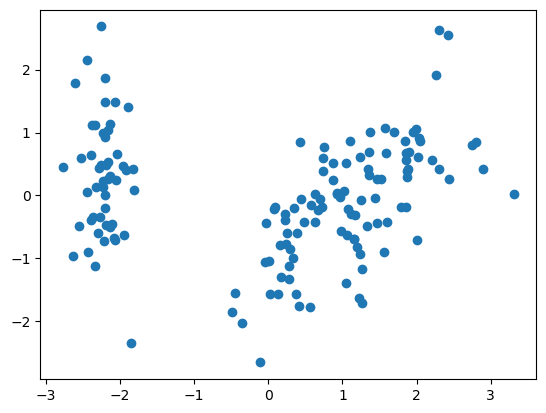

In [25]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

Text(0, 0.5, 'Euclidean Distance')

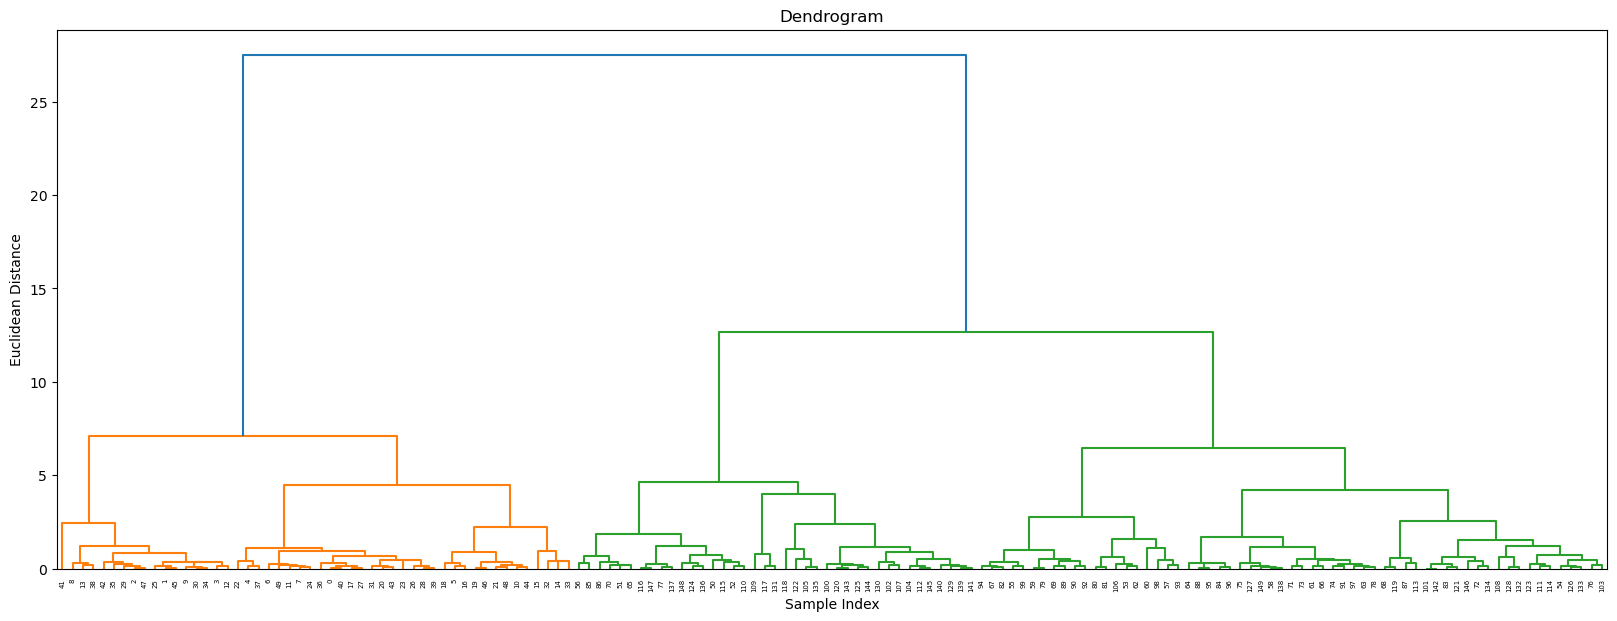

In [31]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Assuming pca_scaled is your PCA-transformed dataset

# Plot dendrogram
plt.figure(figsize=(20, 7))
plt.title("Dendrograms")

# Create dendrogram
dendrogram = sch.dendrogram(sch.linkage(pca_scaled, method='ward'))

# Customize plot
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')



In [38]:
from sklearn.cluster import AgglomerativeClustering

# Initialize the AgglomerativeClustering model
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean', linkage='ward')

# Fit the model
cluster.fit(pca_scaled)



C:\Users\Ayushz\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [39]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

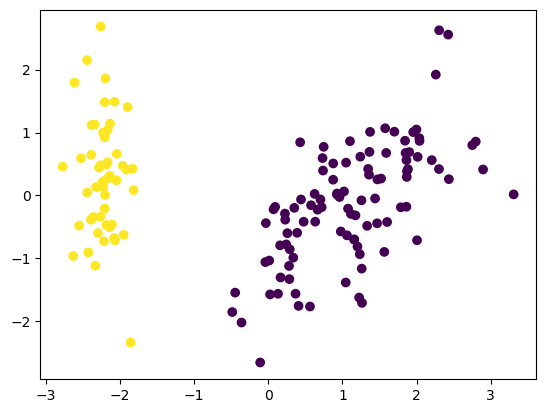

In [41]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [42]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []

In [43]:
for k in range(2,11):
    agglo =  AgglomerativeClustering(n_clusters=2,affinity='euclidean', linkage='ward')
    agglo.fit(x_scaled)
    score=silhouette_score(x_scaled , agglo.labels_)
    silhouette_coefficients.append(score)


C:\Users\Ayushz\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Ayushz\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Ayushz\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Ayushz\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Ayushz\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

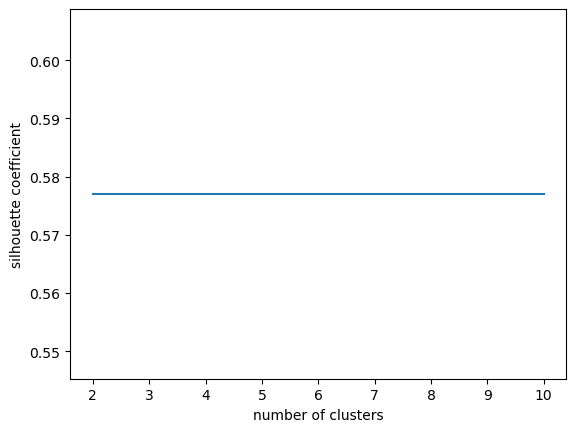

In [45]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("number of clusters")
plt.ylabel("silhouette coefficient")
plt.show()